##Big Mart Sales##


Big Mart Sales is a renowned retail chain that has established itself as a leading destination for a wide range of products, catering to diverse consumer needs. With a sprawling network of stores across various cities and towns, Big Mart Sales offers a vast array of merchandise, including groceries, electronics, apparel, household essentials, and much more.

The hallmark of Big Mart Sales is its commitment to providing customers with high-quality products at competitive prices. Through strategic partnerships with top brands and suppliers, the retail giant ensures a diverse selection of goods that meet stringent quality standards. From fresh produce to the latest gadgets, shoppers can find everything they need under one roof, making Big Mart Sales a convenient one-stop shop for all their requirements.

Predicting sales for a retail chain like Big Mart involves considering various factors such as historical sales data, economic conditions, consumer trends, marketing strategies, and competitor analysis. While I can't provide real-time data or forecasts, I can outline some general considerations for predicting Big Mart Sales:

1. **Historical Sales Data:** Analyzing past sales performance can provide insights into seasonal fluctuations, trends, and patterns. This data serves as a foundation for forecasting future sales.

2. **Economic Indicators:** Economic factors such as GDP growth, inflation rates, employment levels, and consumer confidence can impact consumer spending behavior. A robust economy generally correlates with higher retail sales, while economic downturns may lead to reduced consumer spending.

3. **Consumer Trends:** Understanding changing consumer preferences, demographics, and lifestyle choices is crucial for predicting sales. For instance, shifts towards online shopping, health-conscious buying habits, or sustainability preferences can influence product demand.

4. **Marketing Strategies:** Big Mart's marketing efforts, including advertising campaigns, promotions, discounts, and loyalty programs, play a significant role in driving sales. Assessing the effectiveness of these strategies and their impact on consumer behavior helps in forecasting sales.

5. **Competitor Analysis:** Monitoring competitors' activities, pricing strategies, product offerings, and market share provides valuable insights into industry dynamics and helps anticipate market trends.

6. **Seasonal Variations:** Certain products may experience higher demand during specific seasons or holidays. Understanding these seasonal variations and adjusting inventory levels accordingly is essential for accurate sales predictions.

7. **External Factors:** External events such as natural disasters, regulatory changes, or global pandemics can significantly affect consumer behavior and disrupt supply chains. Assessing the potential impact of these factors on sales is crucial for forecasting accuracy.

**Sales Prediction for Big Mart Outlets**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

We have a train (8523) and test (5681) data set, the train data set has both input and output variable(s). You need to predict the sales for the test data set.

**Columns Details with Description**

**Train File**

**Variable Description**

**Item_Identifier** ---- Unique product ID

**Item_Weight** ---- Weight of product

**Item_Fat_Content** ---- Whether the product is low fat or not

**Item_Visibility** ---- The % of the total display area of all products in a store allocated to the particular product

**Item_Type** ---- The category to which the product belongs

**Item_MRP** ---- Maximum Retail Price (list price) of the product

**Outlet_Identifier** ---- Unique store ID


**Outlet_Establishment_Year** ---- The year in which the store was established

**Outlet_Size** ---- The size of the store in terms of ground area covered

**Outlet_Location_Type** ---- The type of city in which the store is located

**Outlet_Type** ---- Whether the outlet is just a grocery store or some sort of supermarket

**Item_Outlet_Sales** ---- sales of the product in t particular store. This is the outcome variable to be predicted.

**Test File**

**Variable Description**

**Item_Identifier** ----- Unique product ID

**Item_Weight** ---- Weight of product

**Item_Fat_Content** ----- Whether the product is low fat or not

**Item_Visibility** ---- The % of the total display area of all products in a store allocated to the particular product

**Item_Type** ---- The category to which the product belongs

**Item_MRP** ----- Maximum Retail Price (list price) of the product

**Outlet_Identifier** ----- Unique store ID

**Outlet_Establishment_Year** ----- The year in which store store was established

**Outlet_Size** ----- The size of the store in terms of ground area covered

**Outlet_Location_Type** ---- The type of city in which the store is located

**Outlet_Type** ---- whether the outlet is just a grocery store or some sort of supermarket

**Models that are Applied on this prediction**
1. XGBoost
2. Linear Regression
3. Decision Tree
4. Random Forest
5. Naive Bayes
6. KNN

#**Import Libararies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [2]:
df = pd.read_csv("/content/train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df1 = pd.read_csv("/content/test.csv")
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


##**Basic Info**##

In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# Lets look at the skewness of the numerical columns
num_columns = df.select_dtypes(include=['float64','int64'])
skewness = num_columns.apply(lambda x:x.skew())
print('Skewness of the numerical columns: \n',skewness)

Skewness of the numerical columns: 
 Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64


In [9]:
#Lets check for duplicate rows of data
df.duplicated().any()

False

In [10]:
#Lets check for Cardinality
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

**Observations**

1. Shape of our Dataset is : (8523, 12)
2. We have missing values in : Outlet_Size & Item_Weight .
3. **Item_Outlet_Sales** is our target column.
4. Few of the features have very less skewness. Data is almost normally distributed. No column with very high skewness.
5. We don't have any duplicate rows.
6. Few features have very high cardinality like **Item_Visibility**,
   **Item_MRP**, **Item_Outlet_Sales.**
7. dtype of all the columns looks fine.

**Exploratory Data Analysis**

**Now it's the time to do a simple EDA to check any inconsistency or outliers in our dataset**

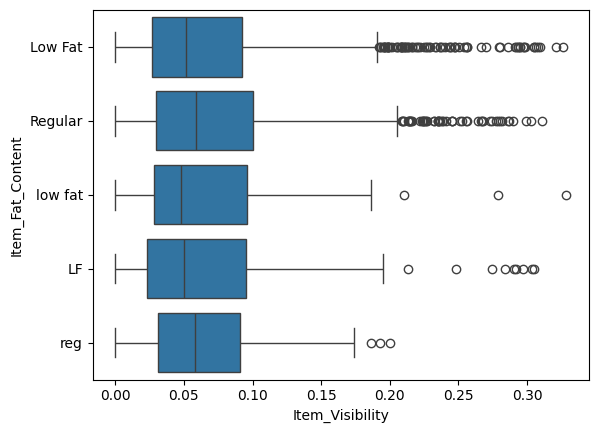

In [11]:
# Lets look at the columns Item_Visibility and Item_Fat_Content
sns.boxplot(x = df['Item_Visibility'], y = df['Item_Fat_Content'])
plt.show()

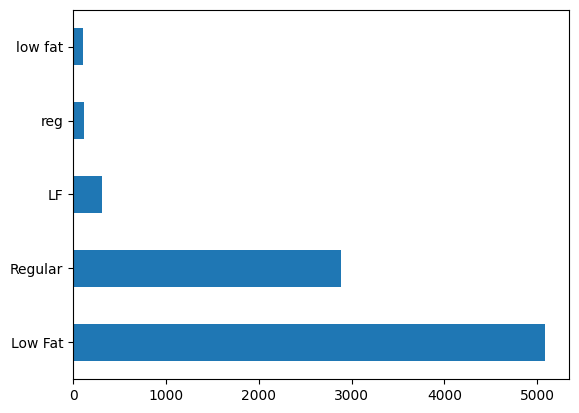

In [12]:
# Lets look at the column Item_Fat_Content
df['Item_Fat_Content'].value_counts().plot(kind='barh')
plt.show()

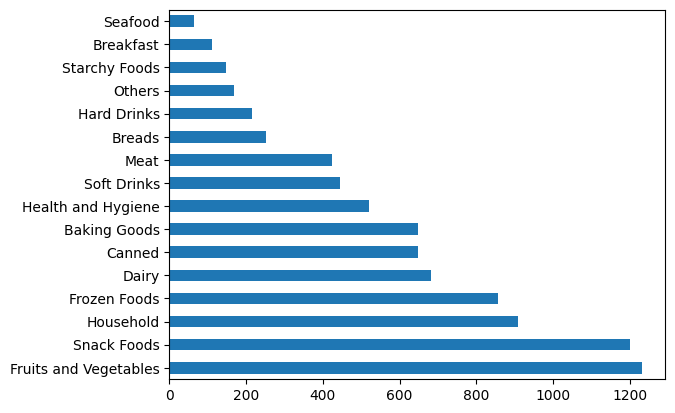

In [13]:
# Lets look at Item_Type column
df['Item_Type'].value_counts().plot(kind='barh')
plt.show()

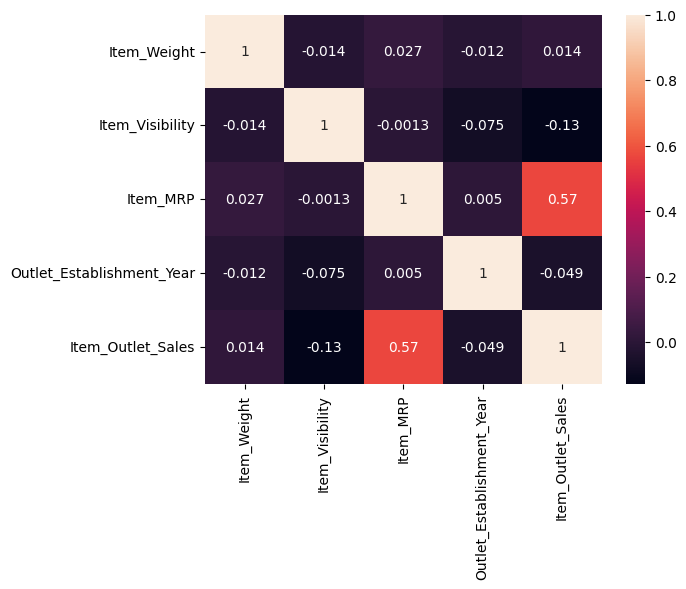

In [14]:
# Lets look at the heatmap for the co-relation
sns.heatmap(num_columns.corr(),annot=True)
plt.show()

**Observation**
1. We have few inconsistencies in Item_Fat_Content
2. Few columns have some amount of co-relation like Item_MRP and Item_Outlet_Sales.

**Data Processing**

**Now lets prepare our Data for Modeling**

 I have made a User defined function to impute the missing values and remove isconsistencies in 'Item_Fat_Content' Lets also make a new column to check the Years of Service

In [15]:
def data_prep(df):
  df['Item_Weight'] = np.where(df['Item_Weight'].isna(),df['Item_Weight'].median(skipna = True),df['Item_Weight'])
  df['Outlet_Size'] = np.where(df['Outlet_Size'].isna(),df['Outlet_Size'].mode()[0], df['Outlet_Size'])
  df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
  df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
  df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
  df['YOB'] = 2023 - df['Outlet_Establishment_Year']
  return df

In [16]:
df_new = data_prep(df)

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  YOB                        8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [18]:
#Lets look at the 'Item_Fat_Content'
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
# Lets do a chi-square test to check the co-relation
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
df_new['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [21]:
df_new['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [22]:
pd.crosstab(df_new['Outlet_Size'], df_new['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,1855,2418
Small,1458,930,0


In [23]:
# Lets import chi2 contingency
from scipy.stats import chi2_contingency

In [24]:
# Lets define a function for chi square test
def chi_sq_test(var1, var2):
  cont_table = pd.crosstab(var1, var2)
  _,p,_,_ = chi2_contingency(cont_table)
  if p < 0.05:
    print('Accept the Alternate Hypothesis (There is a realation between var1 and var2)', round(p, 2))
  else:
    print('Failed to Reject Null Hypothesis (There is no relation between var1 and var2)', round(p, 2))
  return cont_table

In [25]:
chi_sq_test(df_new['Outlet_Size'], df_new['Outlet_Location_Type'])

Accept the Alternate Hypothesis (There is a realation between var1 and var2) 0.0


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,1855,2418
Small,1458,930,0


In [26]:
chi_sq_test(df_new['Item_Fat_Content'], df_new['Item_Type'])

Accept the Alternate Hypothesis (There is a realation between var1 and var2) 0.0


Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,329,140,41,341,418,450,630,214,520,910,170,169,37,692,374,82
Regular,319,111,69,308,264,406,602,0,0,0,255,0,27,508,71,66


**Data Preparation**

**Lets prepare our Data for Modelling**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  YOB                        8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [28]:
df_new.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [29]:
df_new.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'YOB'],
      dtype='object')

In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   YOB                   8523 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [31]:
df_new = pd.get_dummies(df_new, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [32]:
df_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,YOB,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,24,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,14,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,24,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,25,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,36,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Outlet_Sales                8523 non-null   float64
 4   YOB                              8523 non-null   int64  
 5   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 6   Item_Fat_Content_Regular         8523 non-null   uint8  
 7   Item_Type_Baking Goods           8523 non-null   uint8  
 8   Item_Type_Breads                 8523 non-null   uint8  
 9   Item_Type_Breakfast              8523 non-null   uint8  
 10  Item_Type_Canned                 8523 non-null   uint8  
 11  Item_Type_Dairy                  8523 non-null   uint8  
 12  Item_Type_Frozen Foo

**Data Modelling**

**Lets do Train Test Split**

**Lets divide our data into 2 segments :- X and y**

**Train_test_split**

In [34]:
X = df_new.drop(['Item_Outlet_Sales'], axis = 1)
y = df_new['Item_Outlet_Sales']

In [35]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25, random_state = 42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6392, 32)
(2131, 32)
(6392,)
(2131,)


**Linear Regression**

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train = lr.predict(X_train)
lr_test = lr.predict(X_test)

In [38]:
#Lets define a function for Model Evaluation
def model_eval(actual, predicted):
  rmse = np.sqrt(mean_squared_error(actual, predicted))
  r2 = r2_score(actual, predicted)
  print('The RMSE value for the model is: ', round(rmse,2))
  print('The R2 Score for the model is: ', round(r2, 2))

In [39]:
model_eval(y_train, lr_train)

The RMSE value for the model is:  1139.58
The R2 Score for the model is:  0.56


In [40]:
model_eval(y_test, lr_test)

The RMSE value for the model is:  1092.93
The R2 Score for the model is:  0.57


**Random Forest Regressor**

In [41]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
rf_preds_train = rf.predict(X_train)
rf_preds_test = rf.predict(X_test)

In [43]:
y_pred_rf = model_eval(y_train, rf_preds_train)
y_pred_rf

The RMSE value for the model is:  427.83
The R2 Score for the model is:  0.94


In [44]:
y_test_rf = model_eval(y_test, rf_preds_test)

The RMSE value for the model is:  1117.72
The R2 Score for the model is:  0.55


**XG Boost Regressor**

In [46]:
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
preds_XGB_train = XGB.predict(X_train)
preds_XGB_test = XGB.predict(X_test)

In [47]:
y_train_xgb = model_eval(y_train, preds_XGB_train)
y_test_xgb = model_eval(y_test, preds_XGB_test)

The RMSE value for the model is:  617.69
The R2 Score for the model is:  0.87
The RMSE value for the model is:  1160.49
The R2 Score for the model is:  0.51


**Gradient Boosting Regressor**

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
preds_gb_train = gb.predict(X_train)
preds_gb_test = gb.predict(X_test)

In [49]:
y_train_gb = model_eval(y_train, preds_gb_train)
y_test_gb = model_eval(y_test, preds_gb_test)

The RMSE value for the model is:  1036.65
The R2 Score for the model is:  0.64
The RMSE value for the model is:  1057.02
The R2 Score for the model is:  0.6


**HyperTuning**

Lets try and hypertune our model and see if we can further improve the RMSE and R2 Score
Based on the bias variance trade off I have tried to hypertune Gradient Boosting Regressor using RandomizedSearchCV

In [50]:
# Number of estimators
n_estimators = [int(x) for x in np.linspace(start=50, stop=300, num=10)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']

# Maximum number of levels
max_depth = [int(x) for x in np.linspace(3, 15, num=5)] + [None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Learning Rate
l_rate = [0.01, 0.05, 0.1, 0.5]

In [51]:
# Create the random grid
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'learning_rate': l_rate
}

In [52]:
# Randomized Search CV setup
gb_clf = RandomizedSearchCV(estimator=gb, param_distributions=random_grid, n_iter=100, cv=3, random_state=123, n_jobs=-1)

In [53]:
# Lets fit the Randomized Search CV to our data
gb_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [3, 6, 9, 12, 15, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 77, 105, 133, 161,
                                                         188, 216, 244, 272,
                                                         300]},
                   random_state=123)

In [54]:
# Get the best parameters and best score
print("Best Parameters:", gb_clf.best_params_)
print("Best Score:", gb_clf.best_score_)

Best Parameters: {'n_estimators': 244, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.05}
Best Score: 0.5885631219215324


In [55]:
gb2 = GradientBoostingRegressor(n_estimators=105,min_samples_split= 2,min_samples_leaf= 1,
                                max_features='sqrt',max_depth= 3,learning_rate= 0.1)
gb2.fit(X_train, y_train)
preds_gb2_train = gb2.predict(X_train)
preds_gb2_test = gb2.predict(X_test)

In [56]:
y_train_gb2 = model_eval(y_train, preds_gb2_train)
y_test_gb2 = model_eval(y_test,preds_gb2_test )

The RMSE value for the model is:  1064.36
The R2 Score for the model is:  0.62
The RMSE value for the model is:  1048.86
The R2 Score for the model is:  0.6


**Test Data Application**

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [59]:
data_prep(df1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,YOB
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,24
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,16
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,25
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,16
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,38
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,26
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,14
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,21
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,16


In [60]:
df1['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [61]:
df1.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [63]:
df1_new = pd.get_dummies(df1, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [64]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   YOB                              5681 non-null   int64  
 4   Item_Fat_Content_Low Fat         5681 non-null   uint8  
 5   Item_Fat_Content_Regular         5681 non-null   uint8  
 6   Item_Type_Baking Goods           5681 non-null   uint8  
 7   Item_Type_Breads                 5681 non-null   uint8  
 8   Item_Type_Breakfast              5681 non-null   uint8  
 9   Item_Type_Canned                 5681 non-null   uint8  
 10  Item_Type_Dairy                  5681 non-null   uint8  
 11  Item_Type_Frozen Foods           5681 non-null   uint8  
 12  Item_Type_Fruits and

In [65]:
df1_new['Item_Outlet_Sales'] = gb2.predict(df1_new)

In [66]:
df1_new.head()

,Item_Weight,Item_Visibility,Item_MRP,YOB,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,20.750,0.007565,107.8622,24,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1523.641857
1,8.300,0.038428,87.3198,16,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1355.731359
2,14.600,0.099575,241.7538,25,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1145.510981
3,7.315,0.015388,155.0340,16,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,2465.718542
4,12.500,0.118599,234.2300,38,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,5403.421335


In [67]:
df1_new['Item_Outlet_Sales'] = abs(df1_new['Item_Outlet_Sales'])

In [68]:
sam_sub = pd.read_csv("/content/sample_submission.csv")
sam_sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [69]:
sam_sub['Item_Outlet_Sales'] = df1_new['Item_Outlet_Sales']

In [70]:
sam_sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1523.641857
1,FDW14,OUT017,1355.731359
2,NCN55,OUT010,1145.510981
3,FDQ58,OUT017,2465.718542
4,FDY38,OUT027,5403.421335


In [71]:
sam_sub.to_csv('final_output.csv', index = False)

In [72]:
import pickle

In [73]:
filename = 'finalized_model.sav'
pickle.dump(gb, open(filename, 'wb'))

**Conclusion**

By analyzing these factors and employing statistical models such as time series analysis, regression analysis, or machine learning algorithms, retail chains like Big Mart can develop sales forecasts to guide decision-making, optimize inventory management, and maximize profitability. However, it's important to note that sales predictions are subject to uncertainty and may require periodic adjustments based on evolving market conditions and unforeseen events.